# CNN

In [2]:
# TensorFlow와 Keras를 사용한 CNN 모델 구현
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 확인
print("훈련 데이터 크기:", x_train.shape)
print("테스트 데이터 크기:", x_test.shape)

# 데이터 정규화
# (0~255 범위를 0~1 범위로 스케일링)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 데이터 차원 변경
# (CNN은 4차원 입력을 요구: [샘플 수, 높이, 너비, 채널])
x_train = x_train.reshape(-1, 28, 28, 1) # 채널 추가
x_test = x_test.reshape(-1, 28, 28, 1)

# 라벨을 One-Hot Encoding으로 변환
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

훈련 데이터 크기: (60000, 28, 28)
테스트 데이터 크기: (10000, 28, 28)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Sequential API를 사용한 CNN 모델 정의
model = Sequential()

# 첫 번째 합성곱 레이어와 활성화 함수
model.add(Conv2D(32, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 input_shape=(28, 28, 1)))

# 최대 풀링 레이어
model.add(MaxPooling2D(pool_size=(2, 2)))

# 두 번째 합성곱 레이어와 최대 풀링 레이어
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 평탄화 레이어 (Fully Connected 레이어에 입력하기 위해 1차원으로 변환)
model.add(Flatten())

# 완전 연결층과 출력층
model.add(Dense(128, activation='relu')) # 은닉층
model.add(Dense(10, activation='softmax')) # 출력층 (10개 클래스)

# 모델 요약
model.summary()

c:\Project\tensor_proj\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 모델 컴파일
model.compile(optimizer='adam', # 최적화 함수
              loss='categorical_crossentropy', # 손실 함수
              metrics=['accuracy']) # 평가 메트릭
# 모델 학습
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8958 - loss: 0.3314 - val_accuracy: 0.9839 - val_loss: 0.0559
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9847 - loss: 0.0491 - val_accuracy: 0.9864 - val_loss: 0.0456
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9897 - loss: 0.0309 - val_accuracy: 0.9855 - val_loss: 0.0527
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9934 - loss: 0.0215 - val_accuracy: 0.9893 - val_loss: 0.0413
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9951 - loss: 0.0151 - val_accuracy: 0.9883 - val_loss: 0.0401
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9958 - loss: 0.0117 - val_accuracy: 0.9877 - val_loss: 0.0478
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9969 - loss: 0.0088 - val_accuracy: 0.9905 - val_loss: 0.0418
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9970 - loss: 0.

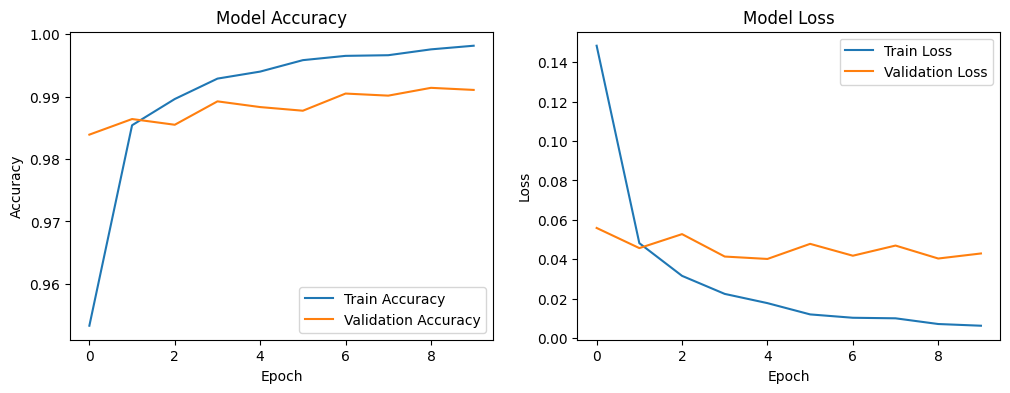

In [5]:
# 학습 결과 시각화
plt.figure(figsize=(12, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
# 테스트 데이터로 성능 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"테스트 손실: {test_loss:.4f}")
print(f"테스트 정확도: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0468
테스트 손실: 0.0377
테스트 정확도: 0.9911
